### Import the required libraries we need for the lab.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

### Load the dataset.

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Generate Descriptive Statistics and Visualizations

### Generate a Boxplot for the Median Value of Owner-Occupied Homes

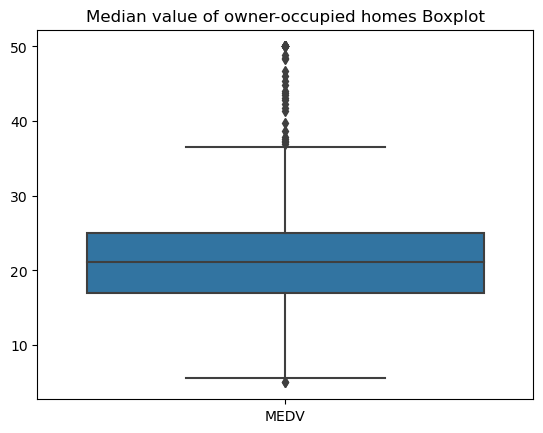

In [3]:
box = sns.boxplot(data=boston_df[['MEDV']])
box.set(title='Median value of owner-occupied homes Boxplot')
plt.show()

The figure above shows the boxplot of the Median value of owner-occupied homes. The first quartile is approximately 18, the median is approximately 21 and the third quartile is approximately 25 

### Generate a Barplot for the Charles River Variable

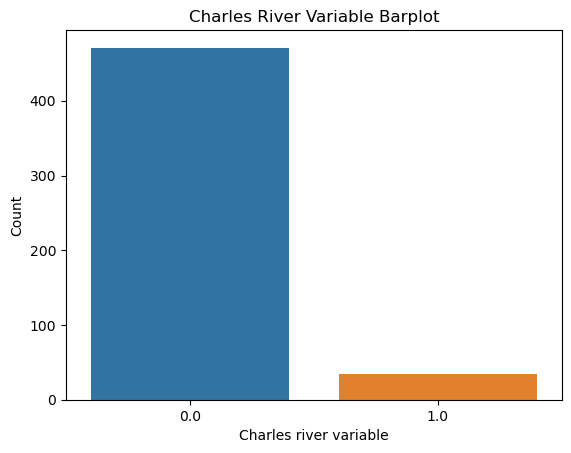

In [4]:
CHAS = boston_df.groupby('CHAS').count().reset_index()
bar = sns.barplot(x="CHAS", y="Unnamed: 0", data=CHAS)
bar.set(title='Charles River Variable Barplot', xlabel='Charles river variable', ylabel='Count')
plt.show()

The figure above shows the bar plot of the Charles River Variable. The number of 0 is approximately 450 and the number of 1 is approximately 30

### Generate a Boxplot for the Median Value of Owner-Occupied Homes VS the Age Variable

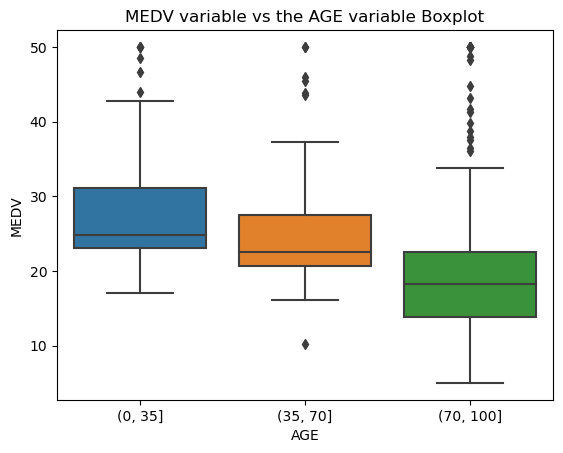

In [5]:
boston_df['AGE_count'] = pd.cut(boston_df['AGE'], [0, 35, 70, 100])
age = sns.boxplot(x="AGE_count", y="MEDV", data=boston_df)
age.set(title='MEDV variable vs the AGE variable Boxplot', xlabel='AGE')
plt.show()

The figure above shows the boxplot of the Median value of owner-occupied homes based on the age group. The median for the 0-35 age group is approximately 24, the median the 35-70 age group is approximately 22 and the median for the 70-100 age group is approximately 19 

### Generate a Scatterplot for the Relationship between Nitric Oxide Concentrations and the Proportion of Non-Retail Business Acres per Town

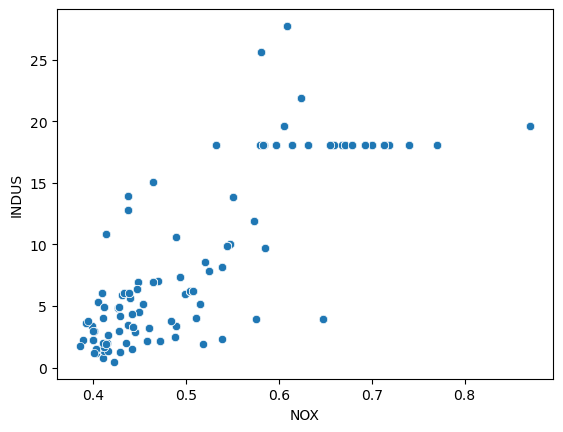

In [6]:
scatter = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

The figure above shows the scatterplot of the relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. The relationship between the two variable is a positive correlation

### Generate a Histogram for the Pupil to Teacher Ratio Variable

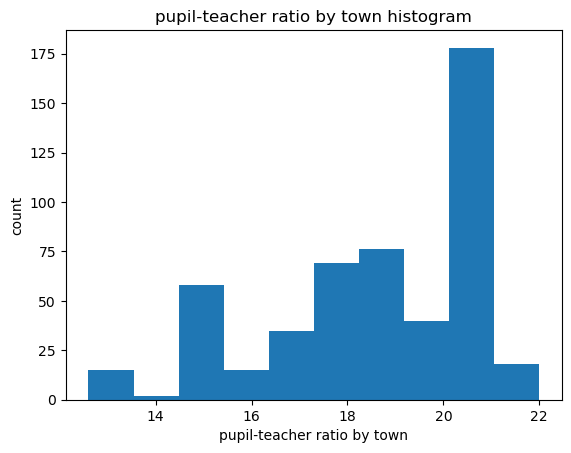

In [7]:
hist = plt.hist(boston_df['PTRATIO'])
plt.title('pupil-teacher ratio by town histogram')
plt.xlabel('pupil-teacher ratio by town')
plt.ylabel('count')
plt.show() 

The figure above shows the histogram of the pupil to teacher ratio variable. The highest number of rations is found between 20 and 21 and the lowest is found at 14.

## Tests

### T-Test

Hypothesis:

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded")

In [8]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha, the null hypothesis is rejected as there is enough proof that there is a here a significant difference in median value of houses bounded by the Charles river.

### ANOVA

Hypothesis:

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [9]:
boston_df.loc[(boston_df['AGE'] <= 30), 'age_group'] = '30 years and younger'
boston_df.loc[(boston_df['AGE'] > 30)&(boston_df['AGE'] < 70), 'age_group'] = 'between 30 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

thirty_lower = boston_df[boston_df['age_group'] == '30 years and younger']['MEDV']
tirty_seventy = boston_df[boston_df['age_group'] == 'between 30 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirty_lower, tirty_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 34.249179272635395, P-Value: 1.135217093487225e-14


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Correlation

Hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [10]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion:** Since the p-value is less than 0.05, we reject  the null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


### Regression Analysis

*   $H\_0: β1$ = 0 (an additional weighted distance has no effect on the five Boston employment centres on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (an additional weighted distance has an effect on the five Boston employment centres on the median value of owner occupied homes)

In [11]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        09:57:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than 0.05, so we reject the null hypothesis. The coefficient 1.0916 means that an additional weighted distance will increase the median value of owner occupied homes by 1.0916.